In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pymc3 as pm
import scipy.io
import scipy as sp

In [2]:
# function to calculate A and B from the dataset
def OUanalytic(data):
    N = data.size
    data1sq = data[0]**2
    dataNsq = data[-1]**2
    datasq = np.sum(data[1:-1]**2)
    datacorr = np.sum(data[0:-1]*data[1:])
    coef = [(N-1)*datasq,
       (2.0-N)*datacorr,
       -data1sq-(N+1)*datasq-dataNsq,
       N*datacorr]
    B=np.roots(coef)[-1]
    Q=(data1sq+dataNsq)/(1-B**2)
    Q=Q+datasq*(1+B**2)/(1-B**2)
    Q=Q-datacorr*2*B/(1-B**2)
    A = Q/N
    P2A = -N/A**2/2
    Btmp = B**2*(1+2*N)
    tmp = (1+Btmp)*(data1sq+dataNsq) + (2*Btmp + N + 1 -B**4*(N-1))*datasq - 2*B*(1+B**2+2*N)*datacorr
    P2B = -tmp/((1-B**2)**2*(data1sq+dataNsq + (1+B**2)*datasq - 2*B*datacorr))
    PAB = (N-1)*B/A/(1-B**2)
    dA = np.sqrt(-P2B/(P2A*P2B-PAB**2))
    dB = np.sqrt(-P2A/(P2A*P2B-PAB**2))
    return A,dA,B,dB

def OUresult(data,deltat):
    A, dA, B ,dB = OUanalytic(data)
    tau = -deltat/np.log(B)
    dtau = deltat*dB/B/np.log(B)**2
    return A,dA,tau,dtau

In [3]:
oxy_sub1=scipy.io.loadmat('oxytocinRSdata/subject1.mat')
oxy_sub1

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Mon Dec 17 12:41:17 2018',
 '__version__': '1.0',
 '__globals__': [],
 'mts': array([[[ 0.53178191, -0.74142832,  0.08471838, ..., -0.19812649,
           1.39021933,  2.84606743]],
 
        [[ 0.11361951,  2.29740763, -2.17058587, ..., -5.01498079,
          -5.85067225, -7.73369217]],
 
        [[-0.59797937,  2.14257908, -1.17834437, ...,  2.36086655,
           1.63610208,  1.81495059]],
 
        [[-0.99375767,  1.94832361,  0.30337405, ..., -0.58349335,
          -0.08255861,  0.64588344]]]),
 'roi_name': array([['LLP.nii '],
        ['mPFC.nii'],
        ['PCC.nii '],
        ['RLP.nii ']], dtype='<U8'),
 'roi_size': array([[1041],
        [1346],
        [4833],
        [1326]])}

In [8]:
llp = oxy_sub1['mts'][0][0]
mpfc = oxy_sub1['mts'][1][0]
pcc = oxy_sub1['mts'][2][0]
rlp = oxy_sub1['mts'][3][0]

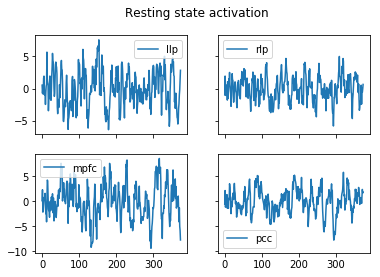

In [10]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
f.suptitle('Resting state activation')
ax1.plot(llp, label="llp")
ax1.legend()
ax2.plot(rlp,label = "rlp")
ax2.legend()
ax3.plot(mpfc,label = "mpfc")
ax3.legend()
ax4.plot(pcc,label = "pcc")
ax4.legend()

mean:  -3.973295399172102e-09
var:  12.157324648100658
N:  374
relaxation time: 3.4670499122105722 SD tau 0.5986987722852464
A  12.3172641921305 SD A 1.8959195407225438


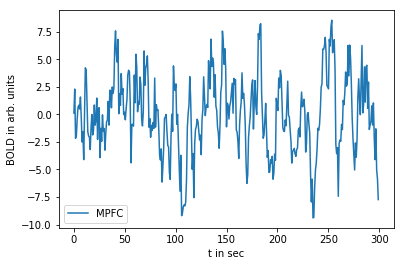

In [6]:
print("mean: ",mpfc.mean())
print("var: ",mpfc.std()**2)
N=len(mpfc)
print("N: ",N)
mpfc_A,mpfc_sA, mpfc_tau, mpfc_dtau = OUresult(mpfc,0.802)
print("relaxation time:",mpfc_tau, "SD tau", mpfc_dtau)
print("A ",mpfc_A,"SD A",mpfc_sA)
mpfc_norm=mpfc/np.sqrt(mpfc_A)
t = np.arange(N)*0.802 # tR = 0.802 sec
plt.plot(t,mpfc,label="MPFC")
plt.xlabel("t in sec")
plt.ylabel("BOLD in arb. units")
plt.legend()

mean:  5.8992063616686324e-09
var:  5.843315535224951
N:  374
relaxation time: 3.8875644990229206 SD tau 0.6899856858450982
A  5.801686757633575 SD A 0.9318155275817791
1.0035812317532151


Text(0,0.5,'BOLD in arb. units')

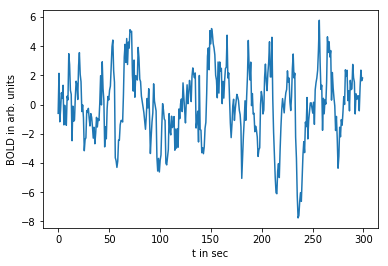

In [7]:
print("mean: ",pcc.mean())
print("var: ",pcc.std()**2)
N=len(pcc)
print("N: ",N)
pcc_A,pcc_sA, pcc_tau, pcc_dtau = OUresult(pcc,0.802)
print("relaxation time:",pcc_tau, "SD tau", pcc_dtau)
print("A ",pcc_A,"SD A",pcc_sA)
pcc_norm=pcc/np.sqrt(pcc_A)
print(pcc_norm.std())
plt.plot(t,pcc)
plt.xlabel("t in sec")
plt.ylabel("BOLD in arb. units")

mean:  8.342060494550409e-10
var:  3.4343058336450034
N:  374
relaxation time: 2.3280770582112775 SD tau 0.3460544746013865
A  3.41965300479105 SD A 0.4319558075230002
1.002140153685346


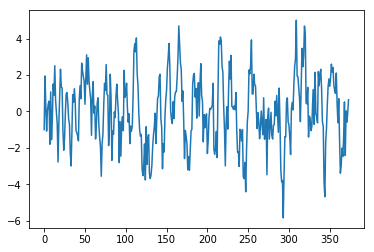

In [8]:
plt.plot(rlp)
print("mean: ",rlp.mean())
print("var: ",rlp.std()**2)
N=len(rlp)
print("N: ",N)
rlp_A,rlp_sA, rlp_tau, rlp_dtau = OUresult(rlp,0.802)
print("relaxation time:",rlp_tau, "SD tau", rlp_dtau)
print("A ",rlp_A,"SD A",rlp_sA)
rlp_norm=rlp/np.sqrt(rlp_A)
print(rlp_norm.std())

mean:  -5.139705331567774e-09
var:  7.5703017731363245
N:  374
relaxation time: 2.9557966301841736 SD tau 0.4757000424242202
A  7.545411270693382 SD A 1.0659814526240807
1.001648022114904


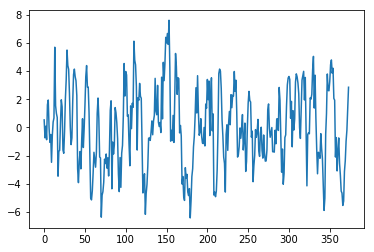

In [9]:
plt.plot(llp)
print("mean: ",llp.mean())
print("var: ",llp.std()**2)
N=len(llp)
print("N: ",N)
llp_A,llp_sA, llp_tau, llp_dtau = OUresult(llp,0.802)
print("relaxation time:",llp_tau, "SD tau", llp_dtau)
print("A ",llp_A,"SD A",llp_sA)
llp_norm=llp/np.sqrt(llp_A)
print(llp_norm.std())

{'whiskers': [<matplotlib.lines.Line2D at 0x1c17108b00>,
 'caps': [<matplotlib.lines.Line2D at 0x1c17113400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c171089b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c17113c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c1711a0b8>],
 'means': []}

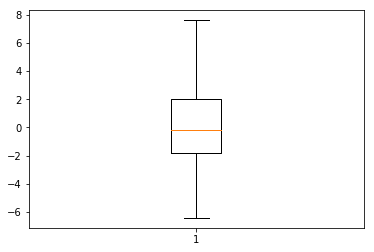

In [10]:
plt.boxplot(llp)

In [11]:
def OUcross(data1,data2):
    x1 = data1 + data2
    x2 = data1 - data2
    x1_A,x1_dA, x1_tau ,x1_dtau= OUresult(x1,0.802)
    x2_A, x2_dA, x2_tau ,x2_dtau= OUresult(x2,0.802)
    return (x1_A - x2_A)/x2_A, np.sqrt(x1_dA**2 + x1_A**2*x2_dA**2/x2_A**4)
print("MPFC:PCC",OUcross(mpfc_norm,pcc_norm))
print("MPFC:RLP",OUcross(mpfc_norm,rlp_norm))
print("MPFC:LLP",OUcross(mpfc_norm,llp_norm))
print("PCC:RLP",OUcross(pcc_norm,rlp_norm))
print("PCC:LLP",OUcross(pcc_norm,llp_norm))
print("RLP:LLP",OUcross(rlp_norm,llp_norm))
print("Pearson MPFC:PCC",sp.stats.pearsonr(mpfc_norm,pcc_norm))
print("Pearson MPFC:RLP",sp.stats.pearsonr(mpfc_norm,rlp_norm))
print("Pearson MPFC:LLP",sp.stats.pearsonr(mpfc_norm,llp_norm))
print("Pearson PCC:RLP",sp.stats.pearsonr(pcc_norm,rlp_norm))
print("Pearson PCC:LLP",sp.stats.pearsonr(pcc_norm,llp_norm))
print("Pearson RLP:LLP",sp.stats.pearsonr(rlp_norm,llp_norm))

MPFC:PCC (1.2230681513878345, 0.5610097728623382)
MPFC:RLP (2.120798789850458, 0.5771514340548303)
MPFC:LLP (0.07086497828702251, 0.33198131963184974)
PCC:RLP (1.248641266432487, 0.5076872311041895)
PCC:LLP (0.879748209302608, 0.49583964564504307)
RLP:LLP (2.4153989924176096, 0.6253345838606071)
Pearson MPFC:PCC (0.39336180539734866, 2.7307105982803503e-15)
Pearson MPFC:RLP (0.5200380786307497, 2.6708893667973057e-27)
Pearson MPFC:LLP (0.04532479678321223, 0.3820883045670219)
Pearson PCC:RLP (0.3829440623285536, 1.6472109726087946e-14)
Pearson PCC:LLP (0.30101587762812276, 2.8464702726288856e-09)
Pearson RLP:LLP (0.5473668527719466, 1.2840988588268106e-30)


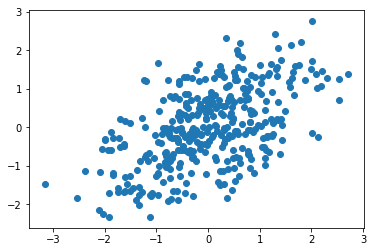

In [12]:
plt.scatter(rlp_norm,llp_norm)

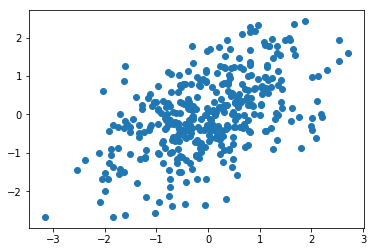

In [13]:
plt.scatter(rlp_norm,mpfc_norm)

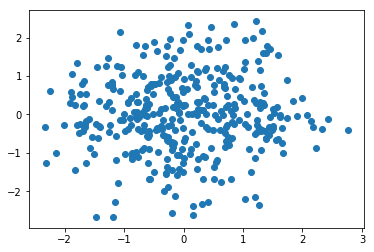

In [14]:
plt.scatter(llp_norm,mpfc_norm)

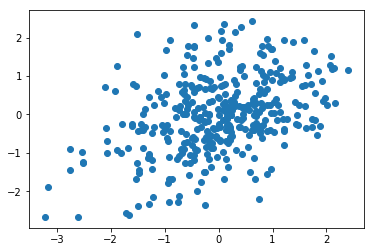

In [15]:
plt.scatter(pcc_norm,mpfc_norm)